<a href="https://colab.research.google.com/github/MateoProjects/IA/blob/main/Aprenentatge_per_refor%C3%A7_cap2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Procés de decisió de Markov**

En la modelización que construiremos, los agentes realizan acciones que representaremos con la letra a en la interacción entre el entorno y el agente en cada time step, que indicaremos con la letra t. En resumen, el agente y el entorno interactúan en una secuencia de time steps discretos, de manera que en un momento dado en el que el entorno se encuentra en un **estado s**, al realizar el agente una **acción a**, este recibe en el siguiente **time step t+1** una **recompensa r’** y el entorno cambia a un** estado s’**.

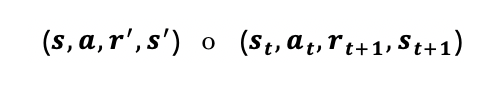

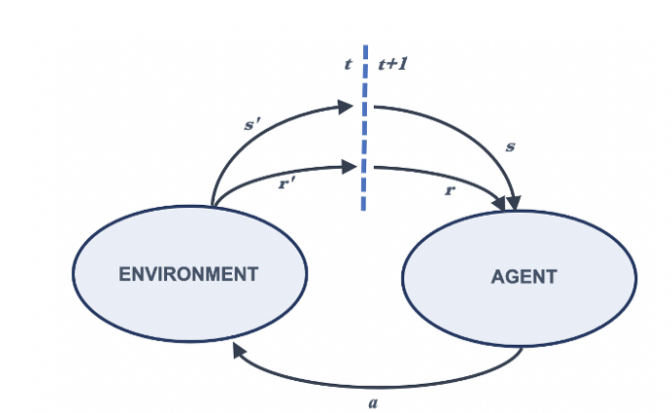

Un proceso de decisión de Markov, o Markov Decision Process (**MDP**) en inglés, proporciona un marco matemático para resolver algunos de los problemas de aprendizaje por refuerzo (RL).

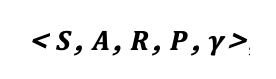
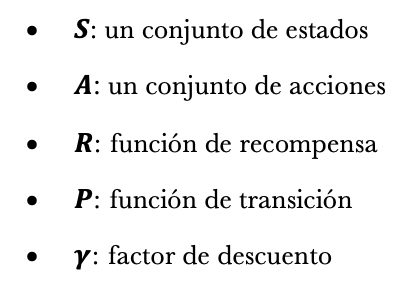

Aquesta comanda permet veure tots els estats possibles. Com nosaltres tenim 16 caselles possibles ens retornarà doncs 16 estats possibles.

In [ ]:
print("State space: ", env.observation_space)

La propiedad de Markov establece que el futuro depende solo del presente y no del pasado, en el sentido de que el estado actual que obtenemos del entorno contiene lo que se necesita para decidir el estado futuro cuando se da una acción de entrada.

En general, podemos categorizar los espacios de acción en dos tipos:
* **Espacio de acción discreto**: cuando nuestro espacio de acción consta de acciones que son discretas. Por ejemplo, en el entorno Frozen-Lake, nuestro espacio de acción consta de cuatro acciones discretas: «izquierda», «abajo», «derecha» y «arriba». Un entorno discreto es aquel cuyo espacio de acción es discreto.


* **Espacio de acción continua**: cuando nuestro espacio de acción se compone de acciones que son continuas. Por ejemplo, cuando conducimos un automóvil, nuestras acciones tienen valores continuos, como la velocidad del automóvil o los grados que necesitamos para girar la rueda, etc. Un entorno continuo es aquel cuyo espacio de acción es continuo.


In [1]:
import gym
env = gym.make("FrozenLake-v0", is_slippery=False)

In [2]:
env.env.P

{0: {0: [(1.0, 0, 0.0, False)],
  1: [(1.0, 4, 0.0, False)],
  2: [(1.0, 1, 0.0, False)],
  3: [(1.0, 0, 0.0, False)]},
 1: {0: [(1.0, 0, 0.0, False)],
  1: [(1.0, 5, 0.0, True)],
  2: [(1.0, 2, 0.0, False)],
  3: [(1.0, 1, 0.0, False)]},
 2: {0: [(1.0, 1, 0.0, False)],
  1: [(1.0, 6, 0.0, False)],
  2: [(1.0, 3, 0.0, False)],
  3: [(1.0, 2, 0.0, False)]},
 3: {0: [(1.0, 2, 0.0, False)],
  1: [(1.0, 7, 0.0, True)],
  2: [(1.0, 3, 0.0, False)],
  3: [(1.0, 3, 0.0, False)]},
 4: {0: [(1.0, 4, 0.0, False)],
  1: [(1.0, 8, 0.0, False)],
  2: [(1.0, 5, 0.0, True)],
  3: [(1.0, 0, 0.0, False)]},
 5: {0: [(1.0, 5, 0, True)],
  1: [(1.0, 5, 0, True)],
  2: [(1.0, 5, 0, True)],
  3: [(1.0, 5, 0, True)]},
 6: {0: [(1.0, 5, 0.0, True)],
  1: [(1.0, 10, 0.0, False)],
  2: [(1.0, 7, 0.0, True)],
  3: [(1.0, 2, 0.0, False)]},
 7: {0: [(1.0, 7, 0, True)],
  1: [(1.0, 7, 0, True)],
  2: [(1.0, 7, 0, True)],
  3: [(1.0, 7, 0, True)]},
 8: {0: [(1.0, 8, 0.0, False)],
  1: [(1.0, 12, 0.0, True)],
  2: [(

In [3]:
class Agent:
  def __init__(self):
    self.actions = {'Left': 0, 'Down': 1, 'Right': 2, 'Up': 3}
    self.good_plan = 2*['Down'] + ['Right'] + ['Down'] + 2*['Right']
    self.step = 0
  
  def select_action(self):
    action = self.good_plan[self.step]
    self.step = (self.step +1) % 6
    return self.actions[action]

  def reset(self):
    self.step = 0

In [4]:
env = gym.make('FrozenLake-v0', is_slippery=False)
env.reset()
env.render()
is_done = False
t = 0
agent = Agent()
while not is_done:
  action = agent.select_action()
  state, reward, is_done, _ = env.step(action)
  env.render()
  t += 1

print('\nlast state = ' , state)
print('reward = ', reward)
print('time steps =', t)


SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG

last state =  15
reward =  1.0
time steps = 6


In [7]:
env = gym.make('FrozenLake-v0')
env.reset()
env.render()
is_done = False
t = 0
agent = Agent()
while not is_done:
  action = agent.select_action()
  state, reward, is_done, _ = env.step(action)
  env.render()
  t += 1

print('\nlast state = ' , state)
print('reward = ', reward)
print('time steps =', t)


SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG

last state =  12
reward =  0.0
time steps = 3


Ara al afegir incertesa el "Good plan" ja no el compleix ja que ara pot relliscar. 

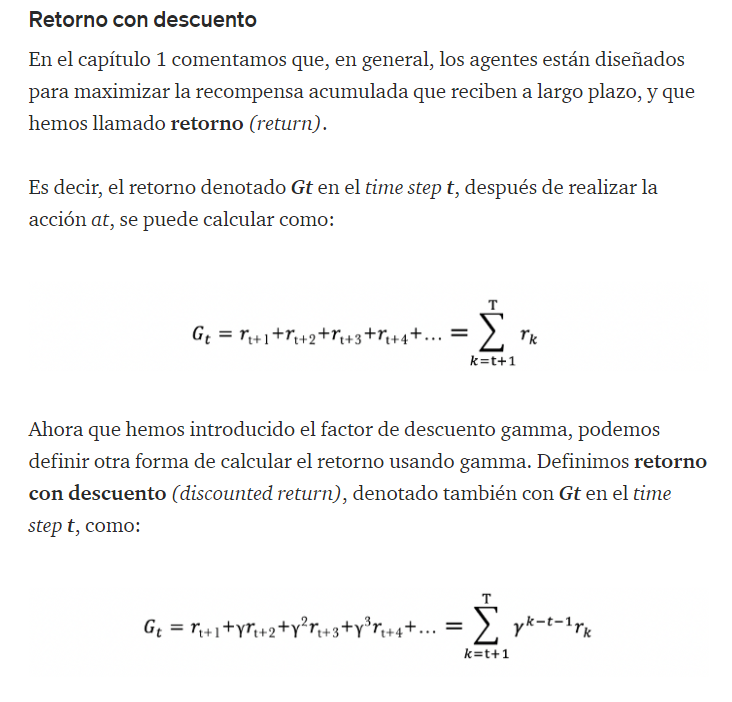

Cuando fijamos el factor de descuento gamma en un valor pequeño (cerca de 0), damos más importancia a las recompensas inmediatas que a las futuras. Cuando fijamos el factor de descuento en un valor alto (cerca de 1), damos más importancia a las recompensas futuras que a las recompensas inmediatas. Un agente da importancia a recompensas inmediatas y futuras dependiendo de las tareas. En algunas tareas, las recompensas futuras son más deseables que las recompensas inmediatas, y viceversa.

Una **política** (policy) define el comportamiento del agente en un entorno. Es «la estrategia» (por ejemplo, algún conjunto de reglas) que el agente emplea para determinar la siguiente acción a realizar. Una política es una función que determina la siguiente acción a realizar cuando el agente se encuentra en un estado del entorno.

En general las políticas también pueden clasificarse como deterministas o estocásticas. Por ejemplo, la política que acabamos de mencionar la consideramos una política determinista (deterministic policy). Una política determinista le dice al agente que realice una acción en particular siempre que se encuentre en un determinado estado s. Es decir, la política determinista mapea cada uno de los estados a una acción en particular.

Podemos clasificar las políticas estocásticas en dos grupos:
* **Política categórica** (categorical policy): cuando el espacio de acción es discreto, y la política utiliza una distribución categórica de probabilidad sobre el espacio de acción para seleccionar. Por ejemplo, en el entorno Frozen-Lake podemos tener una política en la que, dado un estado, seleccionemos una acción dando una probabilidad a «izquierda», «abajo», «derecha» y «arriba» del 5%, 80%, 5% y 10%, respectivamente. En este caso, en este estado concreto, el agente en la mayoría de las ocasiones seleccionará ir hacia abajo, pero de vez en cuando seleccionará las otras acciones.
* **Política gaussiana** (gaussian policy): cuando nuestro espacio de acción es continuo, y la política utiliza una distribución de probabilidad gaussiana sobre el espacio para seleccionar la acción.